# 1. Imports

## Import dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/Volumes/Seagate Backup Plus Drive/Material Data Science/proyectos/Clean_Dataset.csv")

In [4]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FeatureUnion

## Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Models
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 2. Data Understanding

Procedo a observar y entender los datos.

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
df.head().T

,0,1,2,3,4
airline,SpiceJet,SpiceJet,AirAsia,Vistara,Vistara
flight,SG-8709,SG-8157,I5-764,UK-995,UK-963
source_city,Delhi,Delhi,Delhi,Delhi,Delhi
departure_time,Evening,Early_Morning,Early_Morning,Morning,Morning
stops,zero,zero,zero,zero,zero
arrival_time,Night,Morning,Early_Morning,Afternoon,Morning
destination_city,Mumbai,Mumbai,Mumbai,Mumbai,Mumbai
class,Economy,Economy,Economy,Economy,Economy
duration,2.17,2.33,2.17,2.25,2.33
days_left,1,1,1,1,1


In [9]:
df.describe(include=object).T

,count,unique,top,freq
airline,300153,6,Vistara,127859
flight,300153,1561,UK-706,3235
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [11]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
df.duplicated().sum()

0

No hay nulos, ni duplicados en el dataset

# 3. Data Preparation

## Airline

In [13]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

## Flight

In [14]:
df['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [15]:
df.drop(columns=['flight'],inplace=True)

## Source_city

In [16]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

## departure_time

In [17]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [18]:
df[df['departure_time'] == 'Late_Night']

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
1671,GO_FIRST,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.25,11,5954
1678,Indigo,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.17,11,5955
1888,GO_FIRST,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.25,12,5954
1895,Indigo,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.17,12,5955
2104,GO_FIRST,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.25,13,5954
...,...,...,...,...,...,...,...,...,...,...
260464,Air_India,Bangalore,Late_Night,one,Night,Chennai,Business,20.50,34,44682
260568,Air_India,Bangalore,Late_Night,one,Evening,Chennai,Business,17.00,36,44682
260728,Air_India,Bangalore,Late_Night,one,Evening,Chennai,Business,17.00,39,44682
260833,Air_India,Bangalore,Late_Night,one,Night,Chennai,Business,20.50,41,44682


## stops

In [19]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

## arrival_time

In [20]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

## destination_city

In [21]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

## class

In [22]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

Esta variable la convertiremos en Business class, donde marque 1 si es business y 0 si no lo es.

In [23]:
df['business_class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df['business_class'].value_counts()

business_class
0    206666
1     93487
Name: count, dtype: int64

In [24]:
df.drop(columns=['class'],inplace=True)

## duration

In [25]:
df['duration'].describe().T

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

## days_left

In [26]:
df['days_left'].value_counts()

days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64

## price

In [27]:
df['price'].describe().T

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [28]:
#Observo los vuelos con precio mayor a 110k para ver si hay algun outlier

df_mayor_110000 = df[df['price'] > 115000]
df_mayor_110000

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,business_class
215859,Vistara,Delhi,Evening,two_or_more,Evening,Kolkata,21.08,1,116562,1
216096,Vistara,Delhi,Early_Morning,two_or_more,Evening,Kolkata,10.92,5,117307,1
261377,Vistara,Kolkata,Morning,one,Night,Delhi,13.50,3,123071,1
277345,Vistara,Hyderabad,Night,one,Afternoon,Mumbai,16.42,3,115211,1


In [29]:
#Observo los vuelos entre kolkata y delhi con un precio mayor a 100k
filtered_df = df[(df['source_city'] == 'Kolkata') & (df['destination_city'] == 'Delhi') & (df['price'] > 105000)]
filtered_df

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,business_class
261289,Vistara,Kolkata,Night,one,Afternoon,Delhi,17.58,1,107576,1
261376,Vistara,Kolkata,Evening,one,Afternoon,Delhi,20.58,3,107492,1
261377,Vistara,Kolkata,Morning,one,Night,Delhi,13.50,3,123071,1
261499,Vistara,Kolkata,Morning,one,Night,Delhi,13.33,5,108360,1
262196,Vistara,Kolkata,Morning,one,Night,Delhi,13.33,17,109217,1


# 4. Data visualization

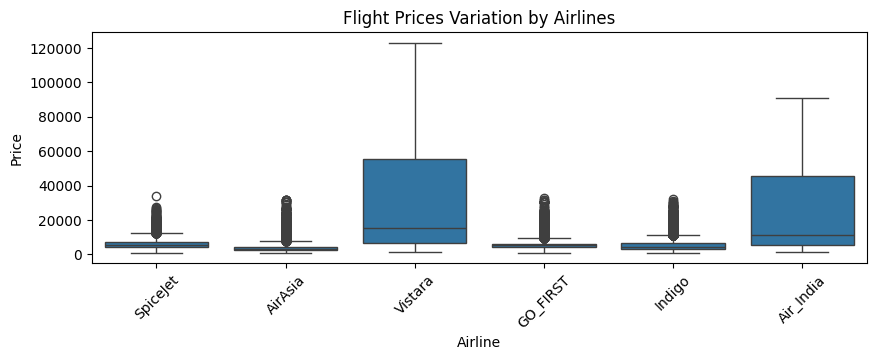

In [30]:
plt.figure(figsize= (10, 3))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Flight Prices Variation by Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show ()

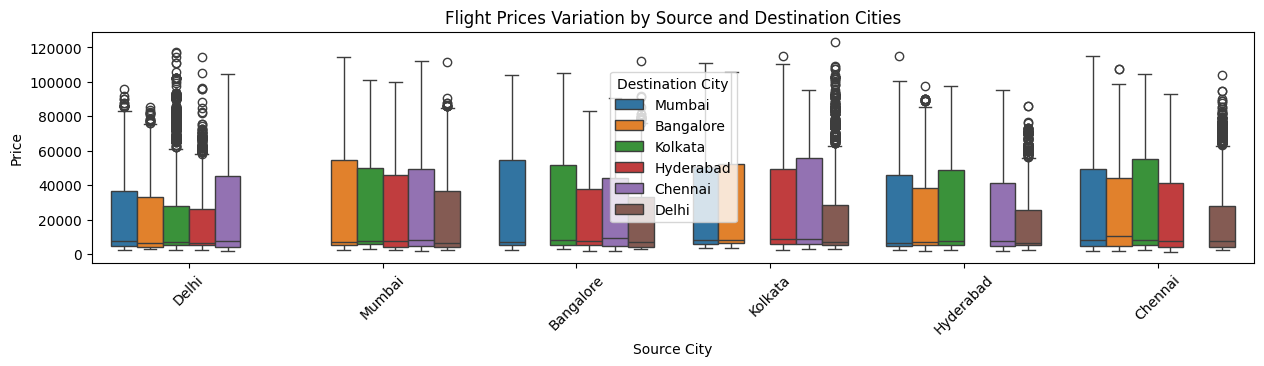

In [31]:
plt.figure(figsize= (15, 3))
sns.boxplot(x='source_city', y='price', data=df, hue='destination_city')
plt.title('Flight Prices Variation by Source and Destination Cities')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Destination City')
plt.show()

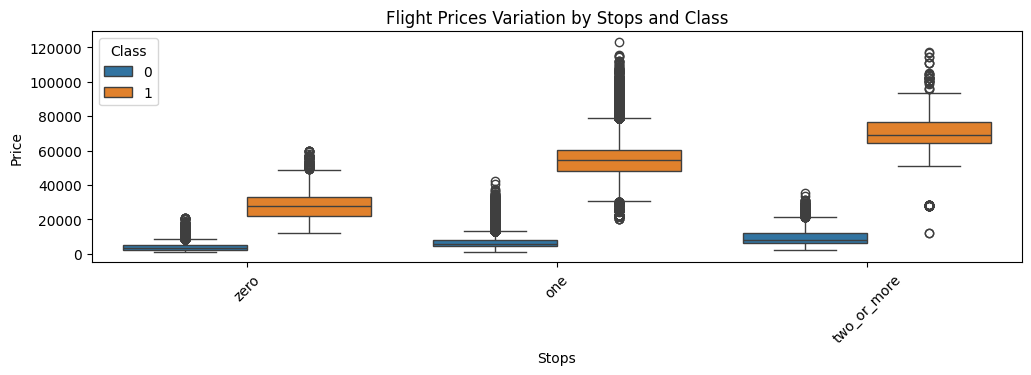

In [32]:
#Price Distribution by Stops and Class
plt.figure(figsize= (12, 3))
sns.boxplot(x='stops', y='price', data=df, hue='business_class')
plt.title('Flight Prices Variation by Stops and Class')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

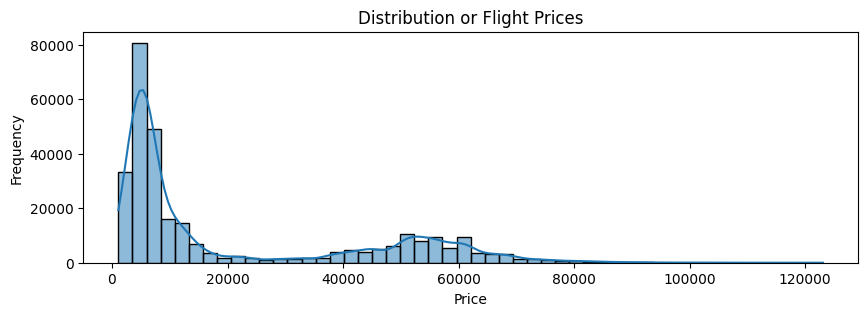

In [33]:
# Plot distribution of flight prices
plt.figure(figsize=(10, 3))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution or Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#OHE

In [34]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   duration          300153 non-null  float64
 7   days_left         300153 non-null  int64  
 8   price             300153 non-null  int64  
 9   business_class    300153 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 22.9+ MB


In [35]:
df.describe(include=object).T

,count,unique,top,freq
airline,300153,6,Vistara,127859
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097


OHE a las columnas categoricas

In [36]:
categorical_cols = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         300153 non-null  object 
 1   duration                      300153 non-null  float64
 2   days_left                     300153 non-null  int64  
 3   price                         300153 non-null  int64  
 4   business_class                300153 non-null  int64  
 5   airline_Air_India             300153 non-null  bool   
 6   airline_GO_FIRST              300153 non-null  bool   
 7   airline_Indigo                300153 non-null  bool   
 8   airline_SpiceJet              300153 non-null  bool   
 9   airline_Vistara               300153 non-null  bool   
 10  source_city_Chennai           300153 non-null  bool   
 11  source_city_Delhi             300153 non-null  bool   
 12  source_city_Hyderabad         300153 non-nul

Ordinal Encoder a la categoria stops ya que tiene un orden y afecta al target

In [ ]:
stop_mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}

df['stops_encoded'] = df['stops'].map(stop_mapping)

df = df.drop('stops', axis=1)

In [38]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      300153 non-null  float64
 1   days_left                     300153 non-null  int64  
 2   price                         300153 non-null  int64  
 3   business_class                300153 non-null  int64  
 4   airline_Air_India             300153 non-null  bool   
 5   airline_GO_FIRST              300153 non-null  bool   
 6   airline_Indigo                300153 non-null  bool   
 7   airline_SpiceJet              300153 non-null  bool   
 8   airline_Vistara               300153 non-null  bool   
 9   source_city_Chennai           300153 non-null  bool   
 10  source_city_Delhi             300153 non-null  bool   
 11  source_city_Hyderabad         300153 non-null  bool   
 12  source_city_Kolkata           300153 non-nul

Vemos la correlación con el target tras convertir las variables categoricas a numéricas.

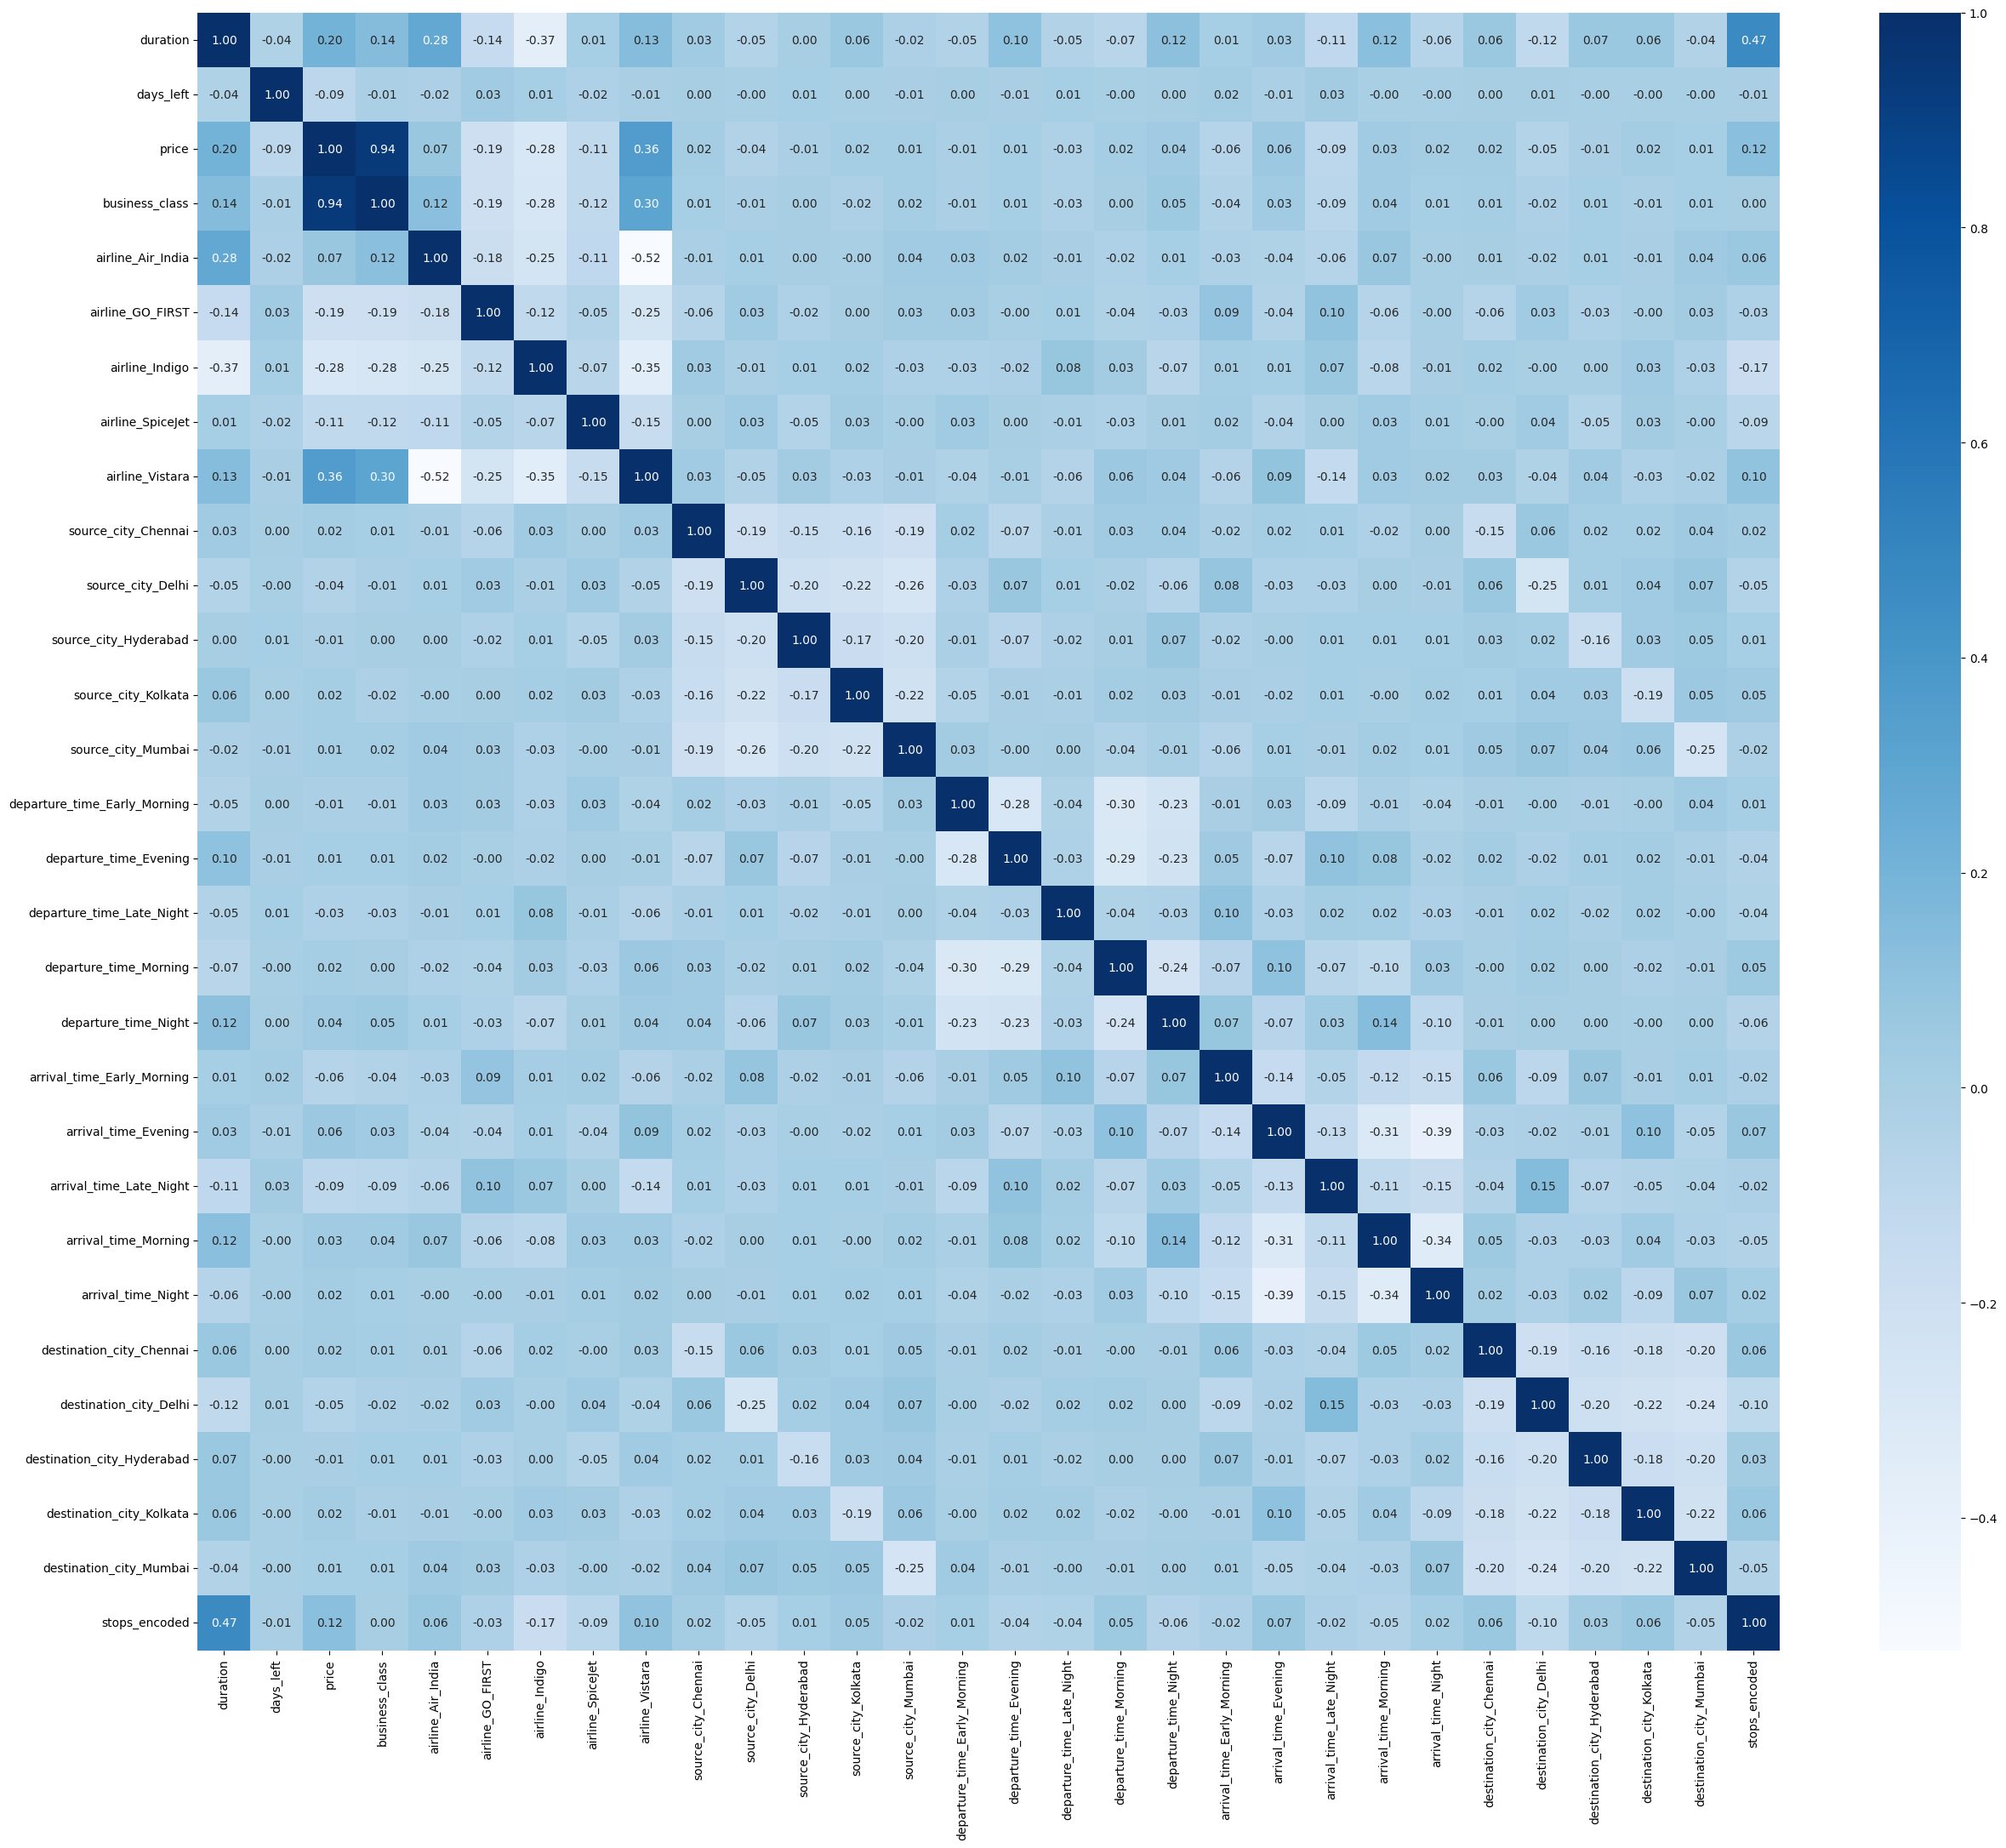

In [39]:
plt.figure(figsize= (30, 25))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

# Modelling and evaluation

In [40]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('price', axis=1)
y = df['price']


In [41]:
# Definir los modelos a probar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}


In [42]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Entrenamiento y evaluación de modelos
results = {}
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluación de rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Almacenar los resultados
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

# Mostrar resultados
results_df = pd.DataFrame(results).T
print(results_df)

                           MAE           MSE         RMSE  R2 Score
Linear Regression  4500.712502  4.644335e+07  6814.935635  0.909903
Decision Tree      1185.678555  1.269993e+07  3563.695677  0.975363
Random Forest      1084.804777  7.822143e+06  2796.809498  0.984826


In [44]:
y_pred

array([ 7361.8  , 70359.77 ,  6197.63 , ...,  6579.04 ,  4045.75 ,
       70786.864])

In [45]:
df['price'].mean()

20889.660523133203

Verifico que el RMSE se acerca al 13%

In [55]:
df['price'].mean()*0.13

2715.6558680073167

El modelo que aporta mejores resultados es el Random Forest.

In [56]:
df['price'].describe().T

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

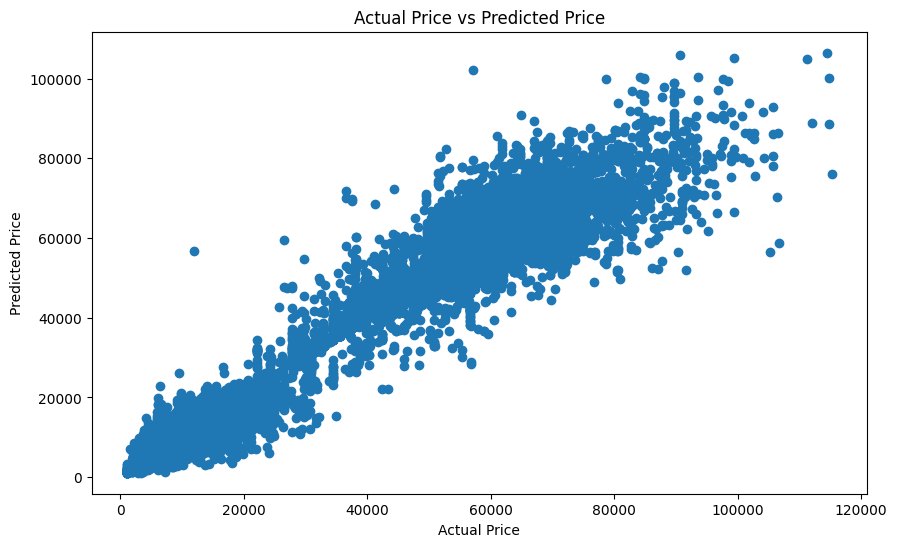

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [58]:
error_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
error_df.head(10)

,y_test,y_pred
27131,7366,7361.80
266857,64831,70359.77
141228,6195,6197.63
288329,60160,60702.80
97334,6578,6193.33
135931,4555,6969.04
290630,23838,23838.00
141944,3860,3866.55
244517,32230,50087.51
215903,76841,66814.16


In [59]:
error_df['error_percentage'] = (abs(y_test - y_pred) / y_test) * 100

In [60]:
error_df['error_percentage'] = error_df['error_percentage'].round(2)

In [61]:
error_df.head()

,y_test,y_pred,error_percentage
27131,7366,7361.80,0.06
266857,64831,70359.77,8.53
141228,6195,6197.63,0.04
288329,60160,60702.80,0.90
97334,6578,6193.33,5.85
